# Face Detection Project - Part 2

On the second part od the project we have implemented the **Sung and Poggio** model for the ***Face Detection*** project.

We have downloaded the *ipynb* library for the importation of the functions from the other Jupyter file.

In [1]:
!pip3 install ipynb

## Importing Dataset

The importation of the datasets is similar to the importation of the other Jupyter file, so there's no need to specify the usage of the functions: much of them are imported from the file with the *Viola and Jones* model.

### wider_face

The *wider_face* dataset is used for the training set and for the test set of the ***Sung and Poggio*** model.

In [2]:
from ipynb.fs.defs.Viola_Jones import query, create_dataframe_first_rows


# URL requests used to pick the first 100 rows of the dataset from the server
API_URL_TRAIN = "https://datasets-server.huggingface.co/first-rows?dataset=wider_face&config=default&split=train"
API_URL_VALIDATION = "https://datasets-server.huggingface.co/first-rows?dataset=wider_face&config=default&split=validation"
API_URL_TEST = "https://datasets-server.huggingface.co/first-rows?dataset=wider_face&config=default&split=test"

# storing the json for the training, validation and testing set 
first_rows_data_train = query(API_URL_TRAIN)
first_rows_data_validation = query(API_URL_VALIDATION)
first_rows_data_test = query(API_URL_TEST)

# saving the dataframe for the first 100 rows of training, validation and testing set
first_row_df_train = create_dataframe_first_rows(first_rows_data_train)
first_row_df_validation = create_dataframe_first_rows(first_rows_data_validation)
first_row_df_test = create_dataframe_first_rows(first_rows_data_test)


# showing an example of dataframe produced
first_row_df_train

image               \
                                                  src height width   
0   https://datasets-server.huggingface.co/assets/...   1385  1024   
1   https://datasets-server.huggingface.co/assets/...   1432  1024   
2   https://datasets-server.huggingface.co/assets/...    768  1024   
3   https://datasets-server.huggingface.co/assets/...    682  1024   
4   https://datasets-server.huggingface.co/assets/...    852  1024   
..                                                ...    ...   ...   
95  https://datasets-server.huggingface.co/assets/...    679  1024   
96  https://datasets-server.huggingface.co/assets/...    768  1024   
97  https://datasets-server.huggingface.co/assets/...    984  1024   
98  https://datasets-server.huggingface.co/assets/...    681  1024   
99  https://datasets-server.huggingface.co/assets/...    847  1024   

                                                faces  \
                                                 bbox   
0                      [[449.0, 330.0, 122.0, 149.0]]   
1                       [[361.0, 98.0, 263.0, 339.0]]   
2   [[78.0, 221.0, 7.0, 8.0], [78.0, 238.0, 14.0, ...   
3   [[69.0, 359.0, 50.0, 36.0], [227.0, 382.0, 56....   
4   [[27.0, 226.0, 33.0, 36.0], [63.0, 95.0, 16.0,...   
..                                                ...   
95  [[903.0, 245.0, 45.0, 53.0], [735.0, 254.0, 36...   
96  [[70.0, 425.0, 17.0, 19.0], [129.0, 463.0, 21....   
97  [[4.0, 289.0, 21.0, 24.0], [1.0, 323.0, 21.0, ...   
98  [[961.0, 453.0, 12.0, 14.0], [986.0, 400.0, 12...   
99  [[798.0, 112.0, 52.0, 66.0], [653.0, 108.0, 52...   

                                                       \
                                                 blur   
0                                                 [0]   
1                                                 [0]   
2   [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...   
3                         [1, 1, 1, 2, 1, 2, 2, 2, 1]   
4   [1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, ...   
..                                                ...   
95   [1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2]   
96         [1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2]   
97  [2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, ...   
98               [1, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2]   
99               [0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2]   

                                                       \
                                           expression   
0                                                 [0]   
1                                                 [0]   
2   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3                         [0, 0, 0, 0, 0, 0, 0, 0, 0]   
4   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
..                                                ...   
95   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   
96         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   
97  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
98               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   
99               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   

                                                       \
                                         illumination   
0                                                 [0]   
1                                                 [0]   
2   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...   
3                         [0, 1, 0, 0, 0, 0, 0, 0, 0]   
4   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
..                                                ...   
95   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   
96         [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   
97  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
98               [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]   
99               [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]   

                                                       \
                                            occlusion   
0                                                 [0]  

In [3]:
from datasets import load_dataset, Image

# Loading the dataset from the server
dataset_server = load_dataset("wider_face").cast_column("image", Image(decode=False))
dataset_local = load_dataset("widerFace", verification_mode='no_checks').cast_column("image", Image(decode=False))

Found cached dataset wider_face (C:/Users/lita4/.cache/huggingface/datasets/wider_face/default/1.0.0/b87ac8d8d65665ec6e3c2a5c6ec08d6fddb1b0f2d7f2dc3b5dcecdaf12adf22f)


  0%|          | 0/3 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/12881 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/3227 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/16098 [00:00<?, ?it/s]

Found cached dataset imagefolder (C:/Users/lita4/.cache/huggingface/datasets/imagefolder/default-d3d22de01261f641/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)


  0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
import pandas as pd
import numpy as np
from pathlib import Path
from PIL import Image
from ipynb.fs.defs.Viola_Jones import truncate_path, create_dataframe_from_server, create_dataframe_from_local, deleting_absent_images, create_dataframe


df_train, df_validation, df_test = create_dataframe(dataset_server, dataset_local)

In [5]:
df_train

image  \
                                                    path   
0      widerFace\data\WIDER_train\images\0--Parade\0_...   
1      widerFace\data\WIDER_train\images\0--Parade\0_...   
2      widerFace\data\WIDER_train\images\0--Parade\0_...   
3      widerFace\data\WIDER_train\images\0--Parade\0_...   
4      widerFace\data\WIDER_train\images\0--Parade\0_...   
...                                                  ...   
12875  widerFace\data\WIDER_train\images\9--Press_Con...   
12876  widerFace\data\WIDER_train\images\9--Press_Con...   
12877  widerFace\data\WIDER_train\images\9--Press_Con...   
12878  widerFace\data\WIDER_train\images\9--Press_Con...   
12879  widerFace\data\WIDER_train\images\9--Press_Con...   

                                                   faces  \
                                                    bbox   
0                         [[449.0, 330.0, 122.0, 149.0]]   
1                          [[361.0, 98.0, 263.0, 339.0]]   
2      [[78.0, 221.0, 7.0, 8.0], [78.0, 238.0, 14.0, ...   
3      [[69.0, 359.0, 50.0, 36.0], [227.0, 382.0, 56....   
4      [[27.0, 226.0, 33.0, 36.0], [63.0, 95.0, 16.0,...   
...                                                  ...   
12875                     [[462.0, 140.0, 264.0, 362.0]]   
12876                     [[362.0, 108.0, 214.0, 277.0]]   
12877                     [[495.0, 222.0, 165.0, 222.0]]   
12878                      [[244.0, 46.0, 510.0, 614.0]]   
12879                     [[400.0, 150.0, 208.0, 290.0]]   

                                                          \
                                                    blur   
0                                                    [0]   
1                                                    [0]   
2      [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...   
3                            [1, 1, 1, 2, 1, 2, 2, 2, 1]   
4      [1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, ...   
...                                                  ...   
12875                                                [0]   
12876                                                [0]   
12877                                                [0]   
12878                                                [0]   
12879                                                [0]   

                                                          \
                                              expression   
0                                                    [0]   
1                                                    [0]   
2      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3                            [0, 0, 0, 0, 0, 0, 0, 0, 0]   
4      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
...                                                  ...   
12875                                                [0]   
12876                                                [0]   
12877                                                [0]   
12878                                                [0]   
12879                                                [0]   

                                                          \
                                            illumination   
0                                                    [0]   
1                                                    [0]   
2      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...   
3                            [0, 1, 0, 0, 0, 0, 0, 0, 0]   
4      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
...                                                  ...   
12875                                                [0]   
12876                                                [0]   
12877                                                [0]   
12878                                                [0]   
12879                                                [0]   

                                                          \
                                               occlusion   
0                         

In [6]:
df_validation

image  \
                                                   path   
0     widerFace\data\WIDER_val\images\0--Parade\0_Pa...   
1     widerFace\data\WIDER_val\images\0--Parade\0_Pa...   
2     widerFace\data\WIDER_val\images\0--Parade\0_Pa...   
3     widerFace\data\WIDER_val\images\0--Parade\0_Pa...   
4     widerFace\data\WIDER_val\images\0--Parade\0_Pa...   
...                                                 ...   
3221  widerFace\data\WIDER_val\images\9--Press_Confe...   
3222  widerFace\data\WIDER_val\images\9--Press_Confe...   
3223  widerFace\data\WIDER_val\images\9--Press_Confe...   
3224  widerFace\data\WIDER_val\images\9--Press_Confe...   
3225  widerFace\data\WIDER_val\images\9--Press_Confe...   

                                                  faces  \
                                                   bbox   
0     [[345.0, 211.0, 4.0, 4.0], [331.0, 126.0, 3.0,...   
1     [[26.0, 299.0, 10.0, 16.0], [25.0, 329.0, 7.0,...   
2     [[311.0, 131.0, 8.0, 9.0], [299.0, 143.0, 10.0...   
3     [[111.0, 425.0, 122.0, 127.0], [209.0, 347.0, ...   
4     [[281.0, 303.0, 20.0, 36.0], [260.0, 324.0, 16...   
...                                                 ...   
3221                     [[334.0, 182.0, 300.0, 400.0]]   
3222                     [[316.0, 224.0, 270.0, 347.0]]   
3223                     [[332.0, 172.0, 294.0, 372.0]]   
3224  [[336.0, 242.0, 152.0, 202.0], [712.0, 278.0, ...   
3225  [[218.0, 190.0, 112.0, 160.0], [302.0, 224.0, ...   

                                                         \
                                                   blur   
0     [2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, ...   
1     [2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 2, 1, ...   
2     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
3                                       [0, 0, 0, 0, 0]   
4     [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...   
...                                                 ...   
3221                                                [0]   
3222                                                [0]   
3223                                                [0]   
3224                                             [0, 0]   
3225                                          [0, 0, 1]   

                                                         \
                                             expression   
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3                                       [1, 1, 1, 1, 1]   
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...   
...                                                 ...   
3221                                                [0]   
3222                                                [0]   
3223                                                [0]   
3224                                             [0, 0]   
3225                                          [0, 0, 0]   

                                                         \
                                           illumination   
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, ...   
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3                                       [0, 0, 0, 0, 0]   
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
...                                                 ...   
3221                                                [0]   
3222                                                [1]   
3223                                                [0]   
3224                                             [0, 0]   
3225                                          [0, 0, 0]   

                                                         \
                                              occlusion   
0     [2, 0, 2, 0, 2, 0, 2, 2, 0, 1, 1, 0, 1, 0, 0, ...   
1     [2, 1, 1, 2, 2, 2, 2, 2, 0,

In [7]:
df_test

image faces       \
                                                    path  bbox blur   
0      widerFace\data\WIDER_test\images\0--Parade\0_P...    []   []   
1      widerFace\data\WIDER_test\images\0--Parade\0_P...    []   []   
2      widerFace\data\WIDER_test\images\0--Parade\0_P...    []   []   
3      widerFace\data\WIDER_test\images\0--Parade\0_P...    []   []   
4      widerFace\data\WIDER_test\images\0--Parade\0_P...    []   []   
...                                                  ...   ...  ...   
16092  widerFace\data\WIDER_test\images\9--Press_Conf...    []   []   
16093  widerFace\data\WIDER_test\images\9--Press_Conf...    []   []   
16094  widerFace\data\WIDER_test\images\9--Press_Conf...    []   []   
16095  widerFace\data\WIDER_test\images\9--Press_Conf...    []   []   
16096  widerFace\data\WIDER_test\images\9--Press_Conf...    []   []   

                                                                     
      expression illumination occlusion pose invalid trucated_cells  
0             []           []        []   []      []           None  
1             []           []        []   []      []           None  
2             []           []        []   []      []           None  
3             []           []        []   []      []           None  
4             []           []        []   []      []           None  
...          ...          ...       ...  ...     ...            ...  
16092         []           []        []   []      []           None  
16093         []           []        []   []      []           None  
16094         []           []        []   []      []           None  
16095         []           []        []   []      []           None  
16096         []           []        []   []      []           None  

[16097 rows x 9 columns]

### Natural Image

Download the folder of a new dataset with non-faces: https://www.kaggle.com/datasets/prasunroy/natural-images

From the *natural image* dataset we can compose the non-face images on the training set of the model.

In [8]:
# Command used to install the opendatasets library
#!pip3 install opendatasets
#{"username":"tommasotalamo","key":"5c9430e1137c86e05db7c46b6cfcf6d3"}

import os
import shutil
import opendatasets as od

# Download the dataset into the NonFaces folder if it is not already done
if not os.path.exists("./NonFaces/"):
    od.download("https://www.kaggle.com/datasets/prasunroy/natural-images")

In [9]:
from ipynb.fs.defs.Viola_Jones import importNonFacesDataset

importNonFacesDataset()

Extraction Completed


## Pre-Processing for the images

Importation of all the functions from the other Jupyter file that determines the pre-processing phase: this process is equal to the other model.

In [10]:
from ipynb.fs.defs.Viola_Jones import resize_image, denoise_image, equalize_histogram, processing

## Preparing the dataset for the Sung & Poggio model

In this part we compose the training set and the test set that we will use for training and testing the **Sung and Poggio** model.

We extract the first 4000 faces from the dataset *wider_face* by using the function *producing_faces* imported from the other Jupyter file.

In [11]:
from os.path import exists
from ipynb.fs.defs.Viola_Jones import producing_faces

df_train_faces = producing_faces(df_train, 0, 4000)
df_train_faces

,path,check_face
0,./Faces/Face_0.jpg,True
1,./Faces/Face_1.jpg,True
2,./Faces/Face_2.jpg,True
3,./Faces/Face_3.jpg,True
4,./Faces/Face_4.jpg,True
...,...,...
3995,./Faces/Face_3995.jpg,True
3996,./Faces/Face_3996.jpg,True
3997,./Faces/Face_3997.jpg,True
3998,./Faces/Face_3998.jpg,True


We extract also 500 faces for the test set of the *Sung and Poggio* model

In [25]:
df_test_faces = producing_faces(df_train, 4001, 4501)
df_test_faces

,path,check_face
0,./Faces/Face_4001.jpg,True
1,./Faces/Face_4002.jpg,True
2,./Faces/Face_4003.jpg,True
3,./Faces/Face_4004.jpg,True
4,./Faces/Face_4005.jpg,True
...,...,...
495,./Faces/Face_4496.jpg,True
496,./Faces/Face_4497.jpg,True
497,./Faces/Face_4498.jpg,True
498,./Faces/Face_4499.jpg,True


Adding ***non-face images*** to the training set and the test set from the dataset *Natural Images*, except for the folder in which there was images with human faces.

In [26]:
from ipynb.fs.defs.Viola_Jones import get_image_paths, add_non_faces, take_first_rows_dataframe

df_train_SungPoggio, df_test_SungPoggio = add_non_faces(df_train_faces, df_test_faces, "./NonFaces", 10)

We import the functions from the other Jupyter file which allow us to create new images by using the sliding windows on the imeges that have not faces.

In this way the model that we are trying to build will recognize the background and other objects as non-face images.

In [33]:
from ipynb.fs.defs.Viola_Jones import create_window, save_windows, create_virtual_image

from PIL import Image
import os
import random
import cv2


create_virtual_image((19, 19), 5, "./NonFaces", "./NewNonFaces_SungPoggio", 500)
df_train_SungPoggio, df_test_SungPoggio = add_non_faces(df_test_SungPoggio, df_test_SungPoggio, "./NewNonFaces_SungPoggio", 8000)

Modification of the order of the **training set** dataframe's rows without keeping the indexes attached to the rows. We can optionally reduce the rows of the dataset by taking only the first rows with a function imported from the other Jupyter file.

In [34]:
# Modifying the order of the rows without keeping the indexes
df_train_SungPoggio = df_train_SungPoggio.sample(len(df_train_SungPoggio), replace=False, random_state=1)
df_train_SungPoggio = df_train_SungPoggio.reset_index(drop = True)
#df_train_SungPoggio = take_first_rows_dataframe(df_train_SungPoggio, 47000)
df_train_SungPoggio

,path,check_face
0,./NewNonFaces_SungPoggio\window_77467.jpg,False
1,./NewNonFaces_SungPoggio\window_7943.jpg,False
2,./NewNonFaces_SungPoggio\window_78780.jpg,False
3,./NewNonFaces_SungPoggio\window_219836.jpg,False
4,./NewNonFaces_SungPoggio\window_178250.jpg,False
...,...,...
46995,./NewNonFaces_SungPoggio\window_99286.jpg,False
46996,./NewNonFaces_SungPoggio\window_159937.jpg,False
46997,./NewNonFaces_SungPoggio\window_226510.jpg,False
46998,./NewNonFaces_SungPoggio\window_159656.jpg,False


We have also modified the the order of the **test set** dataframe's rows without keeping the indexes attached to the rows.
Now we have the dataframes for training and testing the *Sung and Poggio* model.

In [35]:
# Modifying the order of the rows without keeping the indexes
df_test_SungPoggio = df_test_SungPoggio.sample(len(df_test_SungPoggio), replace=False, random_state=1)
df_test_SungPoggio = df_test_SungPoggio.reset_index(drop = True)
#df_test_SungPoggio = take_first_rows_dataframe(df_test_SungPoggio, 15000)
df_test_SungPoggio

,path,check_face
0,./NewNonFaces_SungPoggio\window_224518.jpg,False
1,./NewNonFaces_SungPoggio\window_64100.jpg,False
2,./NewNonFaces_SungPoggio\window_105011.jpg,False
3,./NewNonFaces_SungPoggio\window_14874.jpg,False
4,./NewNonFaces_SungPoggio\window_74354.jpg,False
...,...,...
16505,./NewNonFaces_SungPoggio\window_12963.jpg,False
16506,./NewNonFaces_SungPoggio\window_160607.jpg,False
16507,./NewNonFaces_SungPoggio\window_24402.jpg,False
16508,./NewNonFaces_SungPoggio\window_237133.jpg,False


# Sung & Poggio

In this part we create the **Sung and Poggio** model by our own by following the concepts of the courses *Image and Video Understanding* and *Foundations of Machine Learning*.

## Clustering of the training set with K-Means

The first step for building the Sung and Poggio model is the **separation between faces and non-faces samples** and application of the **pre-processing phase** to each image on the training set.

In [36]:
import cv2


"""
Function that, given the training set, applies the pre-processing phase to each image and it separates the non-face images 
and the face images into two different lists
"""
def separation_and_preprocessing(df_train_SungPoggio):
    
    # Initialization of the lists which contain the faces and the non-faces of the training set
    faces = []
    nonfaces = []
    
    # Iterating through the positional indexes of the training set
    for i in range(len(df_train_SungPoggio)):
        
        # Extracting the current path image, opening the image and pre-processing it
        path_image = df_train_SungPoggio["path"][i]
        image = Image.open(path_image)
        processed_image = processing(image, 19, 19)
        
        # Inserting the images into the correct list by checking their label
        if df_train_SungPoggio["check_face"][i] == True:
            faces.append(processed_image)
        else:
            nonfaces.append(processed_image)
           
    # Returning the lists that contain the arrays of the face and non-face images
    return faces, nonfaces


# Invokation of the previous function which pre-processes and separates the faces with the non-faces from the training set
train_faces, train_nonfaces = separation_and_preprocessing(df_train_SungPoggio)
train_faces, train_nonfaces

([array([[100, 112, 131, 146, 146, 123, 112,  94,  87,  92,  92,  92,  86,
           80,  69,  66,  72,  77,  80],
         [100, 112, 131, 146, 146, 131, 112,  94,  92,  92,  94,  92,  86,
           77,  69,  65,  71,  73,  77],
         [100, 112, 123, 139, 146, 131, 116, 112, 100, 112, 112, 100,  83,
           74,  63,  60,  63,  69,  71],
         [100, 112, 116, 139, 139, 139, 131, 131, 131, 131, 123, 112,  83,
           71,  58,  50,  53,  58,  60],
         [100, 112, 116, 131, 139, 146, 153, 153, 156, 156, 146, 123,  83,
           66,  50,  45,  47,  48,  49],
         [112, 112, 116, 131, 146, 156, 163, 170, 173, 173, 168, 139,  83,
           63,  47,  38,  38,  40,  42],
         [112, 112, 123, 131, 153, 163, 178, 184, 189, 188, 180, 153,  83,
           60,  42,  28,  28,  31,  33],
         [116, 123, 123, 139, 158, 178, 189, 198, 202, 202, 188, 158,  86,
           56,  38,  21,  16,  18,  21],
         [123, 123, 139, 153, 168, 184, 202, 207, 210, 207, 200, 170,  8

Now we apply the **K-Means algorithm** for clustering the face images and the non-face images with *k=6*.
We need to obtain 12 cluster centers:
* 6 non-face cluster centers
* 6 face cluster centers

We also need to reduce the array's of the pre-processed images because otherwise we can't apply the dot products for the computation of the distances needed later.

An exception is throwed if the package *threadpoolctl* is not upgraded, so we will leave commented the command for upgrading that library.

In [37]:
#!pip3 install threadpoolctl --upgrade

In [38]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 


"""
Function that, given the samples and the number of cluster (setted to 6 as default), it reduce the array's image and it applies
the K-Means clustering algorithm to the samples and it returns the reduced samples and the produced cluster centers
"""
def cluster_samples(samples, num_clusters=6):
    
    # Reducing the dimensions of the array's images
    reduced_samples = []
    for img in samples:
        pixels = img.reshape(img.shape[0] * img.shape[1])
        reduced_samples.append(pixels)
    
    # Converting the reduced_sample list into an array
    reduced_samples = np.array(reduced_samples)
    
    # Application of the K-Means cluster algorithm to the reduced samples with a number of clusters setted to 6 by default
    kmeans = KMeans(n_clusters=num_clusters, random_state=42) 
    kmeans.fit(reduced_samples)
    cluster_centers = kmeans.cluster_centers_  
    
    # Returning the cluster's centers and the reduced samples
    return cluster_centers, reduced_samples


# Invocation of the K-Means clustering for the face images and the non-face images in order to obtaining the cluster centers
faces_cluster_centers, train_reduced_faces = cluster_samples(train_faces, num_clusters=6)
nonfaces_cluster_centers, train_reduced_nonfaces = cluster_samples(train_nonfaces, num_clusters=6)

C:\Users\lita4\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lita4\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lita4\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


After obtaining the centers of the non-face and face clusters, we need to compute the *covariance matrix* and the *subspace matrix* in order to obtain all the elements for computing the ***distances*** from an input sample.

In [39]:
"""
Function that, given the reduced input samples, the cluster centers and a number of larger eigenvectors, it computes the 
covariance matrix and the subspace matrix for each cluster center.
The covariance matrix is computed with the cov function from the numpy library, while the subspace matrix is computed through
the number of largest eigenvectors, setted by default to two
"""
def compute_covariance_and_subspace(samples, cluster_centers, num_eigenvectors=2):
    
    # Initialization of the lists that will contain the covariance and the subspace matrices associated to the cluster's center
    covariances = []
    subspaces = []

    # Computation of the covariance and subspace matrices for each cluster's center
    for center in cluster_centers:
        covariance_matrix = np.cov(samples.T)
        _, eigenvectors = np.linalg.eig(covariance_matrix)
        subspace_matrix = eigenvectors[:, :num_eigenvectors]
        covariances.append(covariance_matrix)
        subspaces.append(subspace_matrix)

    # Returning the lists of covariance and subspace matrices
    return covariances, subspaces


# Computation of the covariance and subspace matrices associated to the face and non-face matrices
faces_covariances, faces_subspaces = compute_covariance_and_subspace(train_reduced_faces, faces_cluster_centers)
nonfaces_covariances, nonfaces_subspaces = compute_covariance_and_subspace(train_reduced_nonfaces, nonfaces_cluster_centers)

## Computation of the distances

We need to compute **distances** of a sample to all the face and non-face clusters. Each distance has two parts:
* *Within subspace distance (d1)*: Mahalanobis distance of the projected sample to cluster center
* *Distance to the subspace (d2)*: distance of the sample to the subspace

For each sample to test we have to build a **feature vector**. It is composed by ***24 distances*** value becuase we have:
* 6 face clusters
* 6 non-face clusters
* 2 distance values per cluster

We have decided to create a single function that creates feature vectors for all the samples and we have decided to apply them to the face and non-face samples from the training set in order to use them for training the Neural Network that we will build.

In [40]:
"""
Function that, given a sample, all the cluster centers, all the covariance matrices and all the subspace matrices, it computes the
distances d1 and d2 for each cluster center.
Eventually it returns a list which contains all the 24 floating points numbers as elements.
"""
def compute_distances(sample, cluster_centers, covariance_matrices, subspace_matrices):
    
    # Initialization of the lists which will contain the 24 measurements
    distances = []

    # Iterating through the positional indexes of the cluster centers, the covariance matrices and the subspace matrices
    for i in range(len(cluster_centers)):
        
        # Extracting the current cluster centers, the current covariance matrices and the current subspace matrices
        center = cluster_centers[i]
        covariance_matrix = covariance_matrices[i]
        subspace_matrix = subspace_matrices[i]
        
        # Computing the d1 and d2 distances associated to the sample and the current cluster center and matrices
        d1 = np.linalg.norm(subspace_matrix.T @ (sample - center))
        d2 = np.linalg.norm(sample - center - subspace_matrix @ subspace_matrix.T @ (sample - center))

        # Inserting the two distances into the list
        distances.append(d1)
        distances.append(d2)

    # Returning the distances' list which contain all the 24 measurements
    return distances


"""
Function that, given the samples set, all the cluster centers, all the cluster centers, all the covariance matrices and all the 
subspace matrices, it computes and returns a list of the feature vectors for each image of the input sample
This functions uses compute_distances as auxiliary function for obtaining the feature vector of each sample from the input
sample set
"""
def create_feature_vectors(samples, cluster_centers, covariances, subspaces):
    
    # Initialization of the lists of feature vectors
    feature_vectors = []

    # Iterating all the samples for computing every feature vectors by using the previous function compute_distances
    for sample in samples:
        distances = compute_distances(sample, cluster_centers, covariances, subspaces)
        feature_vectors.append(distances)

    # Returning the list of feature vectors
    return feature_vectors


# Concatenation of the cluster centers, the covariance matrices and the subspace matrices associated to the face or non-face images
cluster_centers = np.concatenate([faces_cluster_centers, nonfaces_cluster_centers]) 
covariances = np.concatenate([faces_covariances + nonfaces_covariances])
subspaces = np.concatenate([faces_subspaces + nonfaces_subspaces])

# Computation of the feature vectors of the face and non-face images from the training set
train_features_vector_face = create_feature_vectors(train_reduced_faces, cluster_centers, covariances, subspaces)
train_features_vector_nonface = create_feature_vectors(train_reduced_nonfaces, cluster_centers, covariances, subspaces)

We need to create a **new dataframe of the training set** which contains two columns:
* The feature vectors of each face or non-face image
* The label of each image

For this reason we concatenate the lists of the feature vectors associated to the face or non-face images of the training set we have created a new lists of labels in which:
* *1* represents the face images
* *0* represents the non-face images

We have chosen the numbers *1* and *0* for representing the ***labels*** instead of the boolean *True* and *False* because for the Neural Network it will easier to identify the predictions and classify the labels.

In [41]:
# Creating a new dataframe which contains the feature vectors of the face and non-face images and their labels
train_images = train_features_vector_face + train_features_vector_nonface
train_labels = [1] * len(train_reduced_faces) + [0] * len(train_reduced_nonfaces)
new_train_df_SungPoggio = pd.DataFrame({'feature_vectors': train_images, 'labels': train_labels}, columns=['feature_vectors', 'labels'])

In [42]:
# Sampling the rows of the dataframe without keeping the number of row's positional indexes
new_train_df_SungPoggio = new_train_df_SungPoggio.sample(len(new_train_df_SungPoggio), replace=False, random_state=0)
new_train_df_SungPoggio = new_train_df_SungPoggio.reset_index(drop = True)
new_train_df_SungPoggio

,feature_vectors,labels
0,"[1150.1100897337922, 1019.627147236577, 1487.9...",0
1,"[2512.3590566010753, 613.7736240219215, 1714.6...",0
2,"[1788.1225995943973, 1569.5729508007953, 1069....",0
3,"[1814.4033134026886, 1060.4010900832182, 652.4...",0
4,"[1767.2009236258625, 1491.8913532478691, 1105....",0
...,...,...
46995,"[706.6603047158204, 963.392387765592, 716.5708...",0
46996,"[2401.1942721200867, 784.1660873091802, 1415.5...",0
46997,"[1192.8758969914447, 1553.207632582711, 736.46...",0
46998,"[224.92931639125254, 791.9287768327785, 1216.1...",0


## Creating a Neural Network classifier

In this part we had to create a **Neural Network** for the *face detection* problem. We have decided to use and install the *pytorch* library instead of *tensorflow* because it was easier to use also due to the fact that a lesson was held in the *Image and Video Understanding* course explaining its usage.

We have decided to use a class called *SungPoggioClassifier* because in this situation it was more intuitive to associate a class to the model which uses a Neural Network for the classification.

The **Neural Network** is composed in the following way:
* 24 input units into the input layer
* 24 hidden units into the unique hidden layer
* 1 output unit into the output layer (face vs non-face)

During classification, the net is given a vector of the current test pattern’s distance measurements to the 12 cluster centroids. Each input pair receives the two-value distance to a specific centroid.
The ***backprogation*** phase is applied for a large training set and we choose as loss function the computation of the *binary cross-entropy* (*BCE*).

BCE loss is used for the ***binary classification*** problems. With a BCE loss function, we just need one output node to classify the data into two classes. The output value should be passed through a sigmoid activation function and the range of output is (0 – 1).

We also choose *Adam* as ***optimization algorihm*** in which we insert ad appropriate *learning rate* value and the *weigh decay* which is a regularization technique by adding a small penalty to the loss function. In this way we prevent overfitting and we prevent the weights to grow out of control. Thanks to this parameter we have obtained the decreasing of the loss value after few epochs. 

In [43]:
#!pip3 install torch

In [44]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

"""
Class used for the creation and the initialization of a Sung and Poggio classifier.
It takes in input the nn.Module, this is a convenient way of encapsulating parameters, with helpers for moving them to GPU, 
exporting, loading, etc.
"""
class SungAndPoggioClassifier(nn.Module):
    
    """
    Initialization of the parameters: it takes in input 24 input units and 24 hidden units by default
    """
    def __init__(self, input_units=24, hidden_units=24):
        super(SungAndPoggioClassifier, self).__init__()
        self.fc1 = nn.Linear(input_units, hidden_units)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_units, 1)   
        self.sigmoid = nn.Sigmoid()

    """
    Method which determines the forward step: 
        * Linear trasformation of the input data: y = x * A^T + b
        * Sigmoid activation function to the trasformed input data
        * Linear trasformation of the hidden data: y = x * A^T + b
        * Sigmoid activation function to the trasformed hidden data in order to producing the output data which goes from 0 to 1
    """ 
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x


"""
Function that allows us to train the instance of SungAndPoggioClassifier model
It takes in input the model instance, the training data, the number of forward and backward steps and the batch size
As loss function criteria we have chosen the BCE loss and we also have used an optimizer object that will hold the current state
and will update the parameters based on the computed gradients.
This function will print the loss in each epoch and we can see that it will decrease a lot in each step
"""
def train_model(model, train_data, train_labels, epochs=100, batch_size=32, learning_rate=1e-5, w_d=1e-5):
    
    # Initialization of the loss criteria and the optimizer of the model's parameters
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-5, weight_decay=1e-4)
    loss_per_epocs = []
    
    # For loop of the number of epochs which determines the number of forward and backward steps
    for epoch in range(epochs):
        running_loss = 0.0
        
        # For loop through all the elements of the training data by jumping by 32 elements at a time
        for i in range(0, len(train_data), batch_size):
            
            # Creating two tensors with the input data (the feature vectors) and the corresponding labels
            inputs = torch.tensor(train_data[i:i+batch_size], dtype=torch.float32, requires_grad=True)
            labels = torch.tensor(train_labels[i:i+batch_size], dtype=torch.float32, requires_grad=True)

            optimizer.zero_grad()

            # Computing the outputs of the models, the loss with BCE, the backwards step and the optimization step
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            # Adding to the total loss of this epoch the loss of the current element
            running_loss += loss.item()
            
        # Printing the total loss of each epochs
        print(f"Epoch {epoch+1}, Loss: {running_loss}")
        loss_per_epocs.append(running_loss)
        
    return loss_per_epocs

"""
Function that applies a prediction of the input data (usually we use the test set data)
It returns the array's prediction which contains floating point numbers which goes from 0 to 1
The elements greater than 0.5 or equal are classified as faces, otherwise they are classified as non-faces.
"""
def predict(model, test_data):
    
    # Inserting the test data into an tensor
    inputs = torch.tensor(test_data, dtype=torch.float32, requires_grad=True)

    # Inserting the tensor in input to the model classifier instance and producing the outputs
    predictions = model(inputs)
    
    # Returning the correspondent array with the prediction elements
    return predictions.detach().numpy()


#train_data = np.random.rand(3000, 24)
#train_labels = np.random.randint(2, size=(3000, 1))

# Preparing the two lists for the columns of the training set
train_data = np.array(new_train_df_SungPoggio["feature_vectors"].tolist())
train_labels = np.array([[el] for el in new_train_df_SungPoggio["labels"].tolist()])


# Creating and training the Sung and Poggio model
model = SungAndPoggioClassifier()
train_model(model, train_data, train_labels)

Epoch 1, Loss: 43192.6845437783
Epoch 2, Loss: 307.9268763762341
Epoch 3, Loss: 307.33860629357537
Epoch 4, Loss: 307.33613851079195
Epoch 5, Loss: 307.29752823245826
Epoch 6, Loss: 307.20539839799847
Epoch 7, Loss: 307.09057636257563
Epoch 8, Loss: 306.92430686727175
Epoch 9, Loss: 306.8009368966935
Epoch 10, Loss: 305.8938440423367
Epoch 11, Loss: 305.2523946453955
Epoch 12, Loss: 303.36150275462137
Epoch 13, Loss: 302.4968340994318
Epoch 14, Loss: 301.0865461029445
Epoch 15, Loss: 300.64072577476827
Epoch 16, Loss: 300.51188612821335
Epoch 17, Loss: 300.4181567014587
Epoch 18, Loss: 300.34047466729714
Epoch 19, Loss: 300.27388692886007
Epoch 20, Loss: 300.2101465746455
Epoch 21, Loss: 300.15073647961356
Epoch 22, Loss: 300.09148169101337
Epoch 23, Loss: 300.17427481878275
Epoch 24, Loss: 300.03731013896527
Epoch 25, Loss: 299.9808798111061
Epoch 26, Loss: 299.93054099080194
Epoch 27, Loss: 299.8866274583347
Epoch 28, Loss: 299.8408707342148
Epoch 29, Loss: 299.80039990700624
Epoch 3

[43192.6845437783,
 307.9268763762341,
 307.33860629357537,
 307.33613851079195,
 307.29752823245826,
 307.20539839799847,
 307.09057636257563,
 306.92430686727175,
 306.8009368966935,
 305.8938440423367,
 305.2523946453955,
 303.36150275462137,
 302.4968340994318,
 301.0865461029445,
 300.64072577476827,
 300.51188612821335,
 300.4181567014587,
 300.34047466729714,
 300.27388692886007,
 300.2101465746455,
 300.15073647961356,
 300.09148169101337,
 300.17427481878275,
 300.03731013896527,
 299.9808798111061,
 299.93054099080194,
 299.8866274583347,
 299.8408707342148,
 299.80039990700624,
 299.75902355695195,
 299.71763144193375,
 299.67814187767243,
 299.63494561169705,
 299.5845143239563,
 299.5364007032567,
 299.4872448505626,
 299.4392109786916,
 299.3954720987334,
 299.3493307772138,
 299.30367305479433,
 299.2607207703968,
 299.2155170123847,
 299.1726103136553,
 299.12795823872096,
 299.08411404543637,
 299.04121887996854,
 298.9991494750856,
 298.9554494854848,
 298.91254513287

## Testing the model on the training set

In this part we do the computation of the accuracy of the ***trained Sung and Poggio*** model by comparing the labels of the training set used for training the model with the prediction of the elements of the training set obtained from the model itself.
In this way we could compute the **accuracy** in the ***training phase*** of our implementation of the *Sung and Poggio model*.

Since the model returns an array of predictions of all the elements of the input set we have managed the accuracy in this way:
* If a prediction element $x \ge 0$ for having a correct classification we neeed to have associated a label equal to one
* Otherwise, if a prediction element $x < 0$ for having a correct classification we neeed to have associated a label equal to zero

In [45]:
"""
Function that apply the trained model to the data used for the training phase.
It takes in input the model instance object and the training set with the feature vectors and the labels of each image
It returns the accuracy value: a floating point value that goes from 0 and 1 which expresses the number of correct classifications:
if this value is near to zero we will have a big number of miscassifications, otherwise we will have a great number of correct
classifications
"""
def testing_training_set(model, new_train_df_SungPoggio):
    
    # Extracting the lists of the feature vectors' column and the list of the labels' column
    train_data = np.array(new_train_df_SungPoggio["feature_vectors"].tolist())
    train_labels = np.array([[el] for el in new_train_df_SungPoggio["labels"].tolist()])
    
    # Applying the prediction with the model instance and the vecture vectors and the training set
    predictions = predict(model, train_data)
    
    # Initialization of the accuracy to zero
    acc = 0
    
    # Comparing for each element the true labels with the predicted labels
    for p, t in zip(predictions, train_labels):
        if p >= 0.5:
            if t == 1:
                acc += 1
        else:
            if t == 0:
                acc += 1
    
    # Returning the floating point value of the accuracy of the training phase
    return acc / len(predictions)


# Invocation of the function
testing_training_set(model, new_train_df_SungPoggio)

0.9978297872340426

## Testing the model on the test set

In this part we do the computation of the accuracy of the ***trained Sung and Poggio*** model by comparing the labels of the test set. In our case we have manually labeled the test images because we want to obtain an **accuracy** value that explains how good is our model to estimate if an image is a face or not.

First of all, we need to compute the ***feature vectors*** of every test image by using the *cluster centers*, the *covariance matrices* and the *subspace matrices* obtained from the training set.

In [46]:
"""
Function that computes the feature vectors given the input images to be tested, the cluster centers, the covariance matrices, 
the subspace matrices and the Sung and Poggio model instance
"""
def computing_feature_vector(test_images, cluster_centers, covariances, subspaces):
    
    # Reducing the dimensions of the array's images
    reduced_samples = []
    for img in test_images:
        reduced_samples.append(img.reshape(img.shape[0] * img.shape[1]))
        
    # Computing the feature vectors for each reduced arrays corresponding to the images of the test set
    test_features_vector = create_feature_vectors(reduced_samples, cluster_centers, covariances, subspaces)
    
    # Returning the feature vectors
    return test_features_vector

We compute the **accuracy** of the test phase with the *testing_test_set* function. We use the previous function for extracting the feature vectors of the test images given the paths.

Since the *predict* function of out *Sung and Poggio* model returns an array of predictions of all the elements of the input set we have managed the accuracy in this way:
* If a prediction element $x \ge 0$ for having a correct classification we neeed to have associated a label equal to one
* Otherwise, if a prediction element $x < 0$ for having a correct classification we neeed to have associated a label equal to zero

In [47]:
"""
Function that apply the trained model to the images of the test set.
It takes in input the model instance object and the test set with the paths and the labels of each image.
For each path image it computes the feature vectors by using the input informations such as the cluster centers, the covariance
matrices and the subspace matrices.
It returns the accuracy value: a floating point value that goes from 0 and 1 which expresses the number of correct classifications:
if this value is near to zero we will have a big number of miscassifications, otherwise we will have a great number of correct
classifications
"""
def testing_test_set(model, df_test_SungPoggio, cluster_centers, covariances, subspaces):
          
    # Extracting the lists of the feature vectors' column and the list of the labels' column
    path_data = np.array(df_test_SungPoggio["path"].tolist())
    test_labels = np.array([[el] for el in df_test_SungPoggio["check_face"].tolist()])
    
    # Preprocessing the test data before the computation of the feature vectors
    test_data = []
    for path in path_data:
        image = Image.open(path)
        processed_image = processing(image, 19, 19)
        test_data.append(processed_image)
    
    
    # Applying the prediction with the model instance and the vecture vectors and the training set
    test_feature_vectors = computing_feature_vector(test_data, cluster_centers, covariances, subspaces)
    predictions = predict(model, test_feature_vectors)
    
    # Initialization of the accuracy to zero
    acc = 0
    
    # Comparing for each element the true labels with the predicted labels
    for p, t in zip(predictions, test_labels):
        if p >= 0.5:
            if t == 1:
                acc += 1
        else:
            if t == 0:
                acc += 1
    
    # Returning the floating point value of the accuracy of the test phase
    return acc / len(predictions)


# Invocation of the function
testing_test_set(model, df_test_SungPoggio, cluster_centers, covariances, subspaces)

0.9697153240460327

## Testing an image with sliding windows

The ***accuracy rate*** is ***high on our test set***, which is composed by 19x19 images that can be faces or not. The model specifies *True* when an image is a face and *False* otherwise.
But if we take a big image in which we have to apply the sliding window 19x19, the checking whether that specific window is a face or not is made a lot of time. 

We have the **problem** that in our training phase we can't specify better *what is it a non-face* like the original paper did: they uses about 3 milion of non-faces by applying the sliding windows on all the non-face images of the training set.
We have decided to show that the model is not trained well for this type of situation, for this reason in a single image, we will obtain a large number of wrong bouding boxes and a *very low accuracy*.

We can't run a larger training set because of the longer execution time of both the model, especially for the execution time of the *training phase* of the *Viola and Jones* model.

The function below extracts all the *sliding windows* from an image and their *coordinates* and it applied the *subsampling*: it reduced the dimensions of the image by mantaining the sliding windows with the same dimensions, in this way the windows can cover a bigger area and so, the bigger faces.

In [48]:
from ipynb.fs.defs.Useful_functions import filter_boxes_by_boolean
from ipynb.fs.defs.Useful_functions import NMS
from ipynb.fs.defs.Useful_functions import merge_nearby_boxes
from ipynb.fs.defs.Useful_functions import draw_red_rectangles_on_image

from PIL import Image


"""
this function facilitates the sliding window approach for object detection by generating windows from an image with 
varying sizes and coordinates, along with performing preprocessing operations.
"""
def sliding_window_image_sp(image, window_size, step, subsampling, reduction_factor):
    # Get the dimensions of the input image and the window size
    img_width, img_height = image.size
    window_width, window_height = window_size

    # Check for invalid inputs and throw exceptions if needed
    if step <= 0 or window_width <= 0 or window_height <= 0:
        raise ValueError("The step and window size must be positive.")
    if window_width > img_width or window_height > img_height:
        raise ValueError("The window size cannot be larger than the image size.")

    # Initialize lists to store processed windows and their coordinates
    window_list, coordinates_window = [], []
    count_progress = 0

    # Loop until desired subsampling level is reached
    while subsampling > 0:
        
        new_image = image  # Create a new copy of the image
        image_processed = processing(new_image, img_width, img_height)  # Apply image processing

        # Iterate through image with the specified step size
        for y in range(0, img_height - window_height + 1, step):
            for x in range(0, img_width - window_width + 1, step):
                # Extract integral window from processed image and add to window_list
                integral_window = image_processed[y:y + window_height, x:x + window_width]
                window_list.append(integral_window)

                # Calculate coordinates of the window considering reduction factor and progression
                x1 = x + int(x * reduction_factor * count_progress)
                y1 = y + int(y * reduction_factor * count_progress)
                x2 = window_width + int(window_width * reduction_factor * count_progress)
                y2 = window_height + int(window_height * reduction_factor * count_progress)

                coordinates_window.append([x1, y1, x2, y2])

        # Resize the image dimensions based on the reduction factor
        img_width = int(img_width * (1 - reduction_factor))
        img_height = int(img_height * (1 - reduction_factor))
        
        count_progress += 1
        subsampling -= 1

        
    # Returning the list of windows and their coordinates
    return window_list, coordinates_window

Now we apply the predictions by using our trained model and we extract the coordinates of all the positive results. Eventually we will print all the bounding boxes obtained on the original image.

We can see that our model ***recognize a large number of faces*** because it has printed a huge number of bounding boxes and most of these are simple misclassifications. We have obtained a ***bad result because we haven't trained well our training set*** and the model is not able to recognize at all what is a non-face image.

Number of boxes:  19


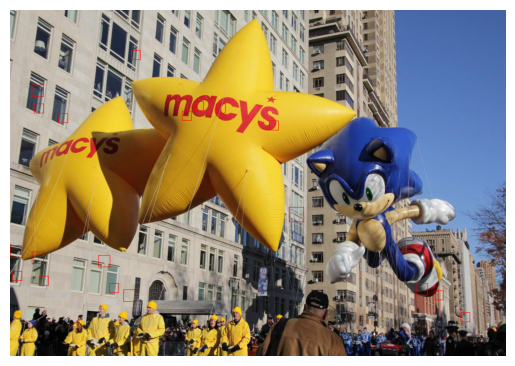

In [49]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw


"""
This function combines sliding window object detection with a trained machine learning model to detect objects in an image 
and visualize the bounding boxes around them.
"""
def show_bounding_boxes_sp(image, model, cluster_centers, covariances, subspaces):
    # Generate a list of windows and their coordinates using sliding window approach
    window_list, coordinates_window = sliding_window_image_sp(image, (19, 19), 5, subsampling=8, reduction_factor=0.30)
    
    # Store the original image for drawing rectangles
    final_image = image
    results = []
    
    # Compute feature vectors for the windows
    test_feature_vectors = computing_feature_vector(window_list, cluster_centers, covariances, subspaces)
    
    # Make predictions using the model on the computed feature vectors
    predictions = predict(model, test_feature_vectors)
    
    # Convert predictions to boolean results and store in 'results' list
    for p in predictions:
        if p >= 0.5:
            results.append(True)
        else:
            results.append(False)
  
    # Filter windows based on boolean results and apply NMS
    nms_coordinate = filter_boxes_by_boolean(coordinates_window, results)
    nms_coordinate = NMS(nms_coordinate, 0.1)
    
    print("Number of boxes: ", len(nms_coordinate))
    
    # Draw red rectangles on the final image around the detected bounding boxes
    for nms in nms_coordinate:
        draw_red_rectangles_on_image(final_image, nms)
            
    return final_image


image_path = df_test["image"]["path"][15]
image = Image.open(image_path)

final_image = show_bounding_boxes_sp(image, model, cluster_centers, covariances, subspaces)
plt.imshow(final_image)
plt.axis('off')  # Turn off axis ticks and labels
plt.show()

## Results and Statistics

In this last part we'll show some results and statistics of our model in term of **execution time** in the training and the test phase and in term of **accuracy**.

Now we want to show a plot in which it take trace the ***decreasing of the loss value*** with the ***number of epochs*** on the neural network from the Sung and Poggio model. We'll also show the differences in term of losses when we *change the learning rate* and the *weight decay* parameters.

Learning rate: 0.0001 and Weight decay: 0.001
Epoch 1, Loss: 319.501192753617
Epoch 2, Loss: 316.6704903300918
Epoch 3, Loss: 317.2397007243711
Epoch 4, Loss: 317.4047136190675
Epoch 5, Loss: 317.40612769613654
Epoch 6, Loss: 317.4086743087428
Epoch 7, Loss: 317.4133787260216
Epoch 8, Loss: 317.42202051200184
Epoch 9, Loss: 317.4345630210282
Epoch 10, Loss: 317.44990335632247
Epoch 11, Loss: 317.47902414436567
Epoch 12, Loss: 317.47390847399856
Epoch 13, Loss: 317.50085781937196
Epoch 14, Loss: 317.4829980259274
Epoch 15, Loss: 317.57741200178884
Epoch 16, Loss: 316.71869021916064
Epoch 17, Loss: 316.5407313145697
Epoch 18, Loss: 316.2880076356232
Epoch 19, Loss: 315.84011950903044
Epoch 20, Loss: 312.53524681688657
Epoch 21, Loss: 312.53897894732654
Epoch 22, Loss: 309.78453118354446
Epoch 23, Loss: 302.22192167536116
Epoch 24, Loss: 291.8583919017725
Epoch 25, Loss: 281.0400054440074
Epoch 26, Loss: 280.50467475366594
Epoch 27, Loss: 276.1479556486076
Epoch 28, Loss: 270.143681788427

Epoch 233, Loss: 14.723865487327203
Epoch 234, Loss: 14.722214296421953
Epoch 235, Loss: 14.680221855705895
Epoch 236, Loss: 14.676901864784668
Epoch 237, Loss: 14.649098688149024
Epoch 238, Loss: 14.624158185248234
Epoch 239, Loss: 14.602553691345747
Epoch 240, Loss: 14.593274689210375
Epoch 241, Loss: 14.568809976328339
Epoch 242, Loss: 14.543722809197789
Epoch 243, Loss: 14.515621628823283
Epoch 244, Loss: 14.516935095376539
Epoch 245, Loss: 14.490279377045226
Epoch 246, Loss: 14.46468145354811
Epoch 247, Loss: 14.438181607067236
Epoch 248, Loss: 14.4297748857025
Epoch 249, Loss: 14.397885271049745
Epoch 250, Loss: 14.409894446445833

Learning rate: 0.0001 and Weight decay: 0.0001
Epoch 1, Loss: 146581.25
Epoch 2, Loss: 146581.25
Epoch 3, Loss: 146581.25
Epoch 4, Loss: 146581.25
Epoch 5, Loss: 146581.25
Epoch 6, Loss: 146581.25
Epoch 7, Loss: 47393.414646827085
Epoch 8, Loss: 108.76740066241462
Epoch 9, Loss: 101.03380470039264
Epoch 10, Loss: 92.3467902729957
Epoch 11, Loss: 83.510

Epoch 216, Loss: 11.839066522908979
Epoch 217, Loss: 11.851759553879674
Epoch 218, Loss: 11.825711350158599
Epoch 219, Loss: 11.832207631330675
Epoch 220, Loss: 11.808832290560531
Epoch 221, Loss: 11.804684223838194
Epoch 222, Loss: 11.798826076264959
Epoch 223, Loss: 11.79731851532415
Epoch 224, Loss: 11.780779900620473
Epoch 225, Loss: 11.775656048215751
Epoch 226, Loss: 11.768290646903552
Epoch 227, Loss: 11.762713528707536
Epoch 228, Loss: 11.757113381932868
Epoch 229, Loss: 11.74750592388591
Epoch 230, Loss: 11.737821586060818
Epoch 231, Loss: 11.731794503813944
Epoch 232, Loss: 11.721371476416607
Epoch 233, Loss: 11.719931291956527
Epoch 234, Loss: 11.70408154355573
Epoch 235, Loss: 11.705221737911415
Epoch 236, Loss: 11.690107340133181
Epoch 237, Loss: 11.690752110705944
Epoch 238, Loss: 11.673876677557928
Epoch 239, Loss: 11.67247379161563
Epoch 240, Loss: 11.666828745881503
Epoch 241, Loss: 11.658573674892978
Epoch 242, Loss: 11.652923298335736
Epoch 243, Loss: 11.642464940057

Epoch 198, Loss: 13.826592103858275
Epoch 199, Loss: 13.821585533780308
Epoch 200, Loss: 13.80171213534777
Epoch 201, Loss: 13.798273601660185
Epoch 202, Loss: 13.788714524453098
Epoch 203, Loss: 13.769325834873598
Epoch 204, Loss: 13.765208997454465
Epoch 205, Loss: 13.76746280758016
Epoch 206, Loss: 13.741023620372289
Epoch 207, Loss: 13.752559956621553
Epoch 208, Loss: 13.736771715051873
Epoch 209, Loss: 13.723946292469918
Epoch 210, Loss: 13.720518911199179
Epoch 211, Loss: 13.697267050185474
Epoch 212, Loss: 13.695719819363148
Epoch 213, Loss: 13.685061889453209
Epoch 214, Loss: 13.680325944937067
Epoch 215, Loss: 13.674688949482515
Epoch 216, Loss: 13.639445393830101
Epoch 217, Loss: 13.650667222726042
Epoch 218, Loss: 13.682347944435605
Epoch 219, Loss: 13.65239690558883
Epoch 220, Loss: 13.63304912528838
Epoch 221, Loss: 13.62572025573536
Epoch 222, Loss: 13.620661913199001
Epoch 223, Loss: 13.607872011984
Epoch 224, Loss: 13.595456158131128
Epoch 225, Loss: 13.586393466939626


Epoch 182, Loss: 13.25634527969305
Epoch 183, Loss: 13.252192020459916
Epoch 184, Loss: 13.215669920216897
Epoch 185, Loss: 13.225833834625519
Epoch 186, Loss: 13.222194560963544
Epoch 187, Loss: 13.191379220770614
Epoch 188, Loss: 13.176067766755295
Epoch 189, Loss: 13.197533328846475
Epoch 190, Loss: 13.160286184982397
Epoch 191, Loss: 13.150342740445922
Epoch 192, Loss: 13.142743413689459
Epoch 193, Loss: 13.148955116859725
Epoch 194, Loss: 13.13430602371227
Epoch 195, Loss: 13.135366486996645
Epoch 196, Loss: 13.116205705351604
Epoch 197, Loss: 13.119208870521106
Epoch 198, Loss: 13.087545592657989
Epoch 199, Loss: 13.084453029085125
Epoch 200, Loss: 13.072598157868924
Epoch 201, Loss: 13.078035997532425
Epoch 202, Loss: 13.068077844422078
Epoch 203, Loss: 13.048933253245195
Epoch 204, Loss: 13.050039942929288
Epoch 205, Loss: 13.029292642095243
Epoch 206, Loss: 13.034656561685551
Epoch 207, Loss: 13.00646336868158
Epoch 208, Loss: 13.01446817938995
Epoch 209, Loss: 12.982885198973

Epoch 165, Loss: 78.06541135362107
Epoch 166, Loss: 77.6684998454756
Epoch 167, Loss: 77.24727485609834
Epoch 168, Loss: 76.89790221378435
Epoch 169, Loss: 76.52797833486252
Epoch 170, Loss: 76.15170065493892
Epoch 171, Loss: 75.79103421099677
Epoch 172, Loss: 75.39629518501381
Epoch 173, Loss: 74.19547770084284
Epoch 174, Loss: 73.63362705238491
Epoch 175, Loss: 73.03098050411698
Epoch 176, Loss: 72.40233514748242
Epoch 177, Loss: 71.6638695820304
Epoch 178, Loss: 70.94695883370483
Epoch 179, Loss: 69.87452267287983
Epoch 180, Loss: 69.1129935834551
Epoch 181, Loss: 68.36765379574265
Epoch 182, Loss: 67.64130706779754
Epoch 183, Loss: 66.98613772460382
Epoch 184, Loss: 66.33532160669797
Epoch 185, Loss: 64.8808471421178
Epoch 186, Loss: 63.75873743166344
Epoch 187, Loss: 62.983058229179164
Epoch 188, Loss: 62.23410328449421
Epoch 189, Loss: 61.147185050645234
Epoch 190, Loss: 60.35226979737713
Epoch 191, Loss: 59.59472354870493
Epoch 192, Loss: 58.8238826009405
Epoch 193, Loss: 58.039

Epoch 148, Loss: 112.659372621451
Epoch 149, Loss: 112.22458964495655
Epoch 150, Loss: 111.44983065478773
Epoch 151, Loss: 111.04626823656626
Epoch 152, Loss: 110.67129757997441
Epoch 153, Loss: 110.30213227179061
Epoch 154, Loss: 109.93570245374835
Epoch 155, Loss: 109.58397432857133
Epoch 156, Loss: 109.2366311152679
Epoch 157, Loss: 108.89947444198273
Epoch 158, Loss: 108.54685805206606
Epoch 159, Loss: 108.18521260525954
Epoch 160, Loss: 107.78943897736264
Epoch 161, Loss: 106.9572947248163
Epoch 162, Loss: 106.46170490451436
Epoch 163, Loss: 105.9151487989702
Epoch 164, Loss: 105.41262007702952
Epoch 165, Loss: 104.55641692873267
Epoch 166, Loss: 104.05935325910556
Epoch 167, Loss: 103.56989299491995
Epoch 168, Loss: 103.10747647118473
Epoch 169, Loss: 102.66585537190073
Epoch 170, Loss: 102.2399741818052
Epoch 171, Loss: 101.80749102252467
Epoch 172, Loss: 101.28707752302515
Epoch 173, Loss: 100.74028806437853
Epoch 174, Loss: 100.19692739082417
Epoch 175, Loss: 99.6349698068634


Epoch 134, Loss: 75.80911208019619
Epoch 135, Loss: 75.72720108851537
Epoch 136, Loss: 75.65325448686157
Epoch 137, Loss: 75.5733457739884
Epoch 138, Loss: 75.85173891243706
Epoch 139, Loss: 75.78149921721099
Epoch 140, Loss: 75.705835088316
Epoch 141, Loss: 75.62802835436996
Epoch 142, Loss: 75.56142306868831
Epoch 143, Loss: 75.48071373870476
Epoch 144, Loss: 75.40885612066438
Epoch 145, Loss: 75.34458961747353
Epoch 146, Loss: 75.33754082545029
Epoch 147, Loss: 75.38686163603471
Epoch 148, Loss: 75.34549540349367
Epoch 149, Loss: 75.2827215305702
Epoch 150, Loss: 75.23288395709756
Epoch 151, Loss: 75.1733836902858
Epoch 152, Loss: 75.1596796248265
Epoch 153, Loss: 75.16339097913321
Epoch 154, Loss: 75.08550963900548
Epoch 155, Loss: 74.99945713420239
Epoch 156, Loss: 75.00543613733227
Epoch 157, Loss: 74.97748181122151
Epoch 158, Loss: 74.86449704298862
Epoch 159, Loss: 74.78698529785059
Epoch 160, Loss: 74.77918817564613
Epoch 161, Loss: 74.72206177514799
Epoch 162, Loss: 74.616871

Epoch 120, Loss: 21.923181540416863
Epoch 121, Loss: 21.812584068105366
Epoch 122, Loss: 21.710175296456327
Epoch 123, Loss: 21.60483656057562
Epoch 124, Loss: 21.52140288786029
Epoch 125, Loss: 21.41200182465093
Epoch 126, Loss: 21.31153808964916
Epoch 127, Loss: 21.208273786506084
Epoch 128, Loss: 21.114097937235783
Epoch 129, Loss: 20.993539723490358
Epoch 130, Loss: 20.902333375884723
Epoch 131, Loss: 20.793105122305974
Epoch 132, Loss: 20.71863050839795
Epoch 133, Loss: 20.6014381266682
Epoch 134, Loss: 20.500763671447885
Epoch 135, Loss: 20.40842942657048
Epoch 136, Loss: 20.315740534286533
Epoch 137, Loss: 20.211723914550248
Epoch 138, Loss: 20.100314967301756
Epoch 139, Loss: 19.992151859811088
Epoch 140, Loss: 19.897191257890427
Epoch 141, Loss: 19.774030614870753
Epoch 142, Loss: 19.658592437800735
Epoch 143, Loss: 19.55677861599429
Epoch 144, Loss: 19.476094774371177
Epoch 145, Loss: 19.378246623624136
Epoch 146, Loss: 19.289573893120405
Epoch 147, Loss: 19.1706972270772
Epo

Epoch 102, Loss: 144.58050944355688
Epoch 103, Loss: 143.57018368948133
Epoch 104, Loss: 142.6039302613324
Epoch 105, Loss: 141.76122708170794
Epoch 106, Loss: 140.84339384045649
Epoch 107, Loss: 139.9727620556974
Epoch 108, Loss: 138.74546734518145
Epoch 109, Loss: 137.7358714752377
Epoch 110, Loss: 136.66725590156372
Epoch 111, Loss: 135.20586160373844
Epoch 112, Loss: 134.30811998940328
Epoch 113, Loss: 133.42177126899713
Epoch 114, Loss: 132.18637251639856
Epoch 115, Loss: 130.8634381667171
Epoch 116, Loss: 129.80659288826092
Epoch 117, Loss: 128.40977197646305
Epoch 118, Loss: 124.6196966146164
Epoch 119, Loss: 123.41701108222315
Epoch 120, Loss: 121.93507730119866
Epoch 121, Loss: 120.69500155941412
Epoch 122, Loss: 119.56421972713432
Epoch 123, Loss: 118.48446771778768
Epoch 124, Loss: 117.36453999393524
Epoch 125, Loss: 116.2093726396345
Epoch 126, Loss: 114.96035645668661
Epoch 127, Loss: 113.31792361871311
Epoch 128, Loss: 111.97771962312734
Epoch 129, Loss: 110.6641093393917

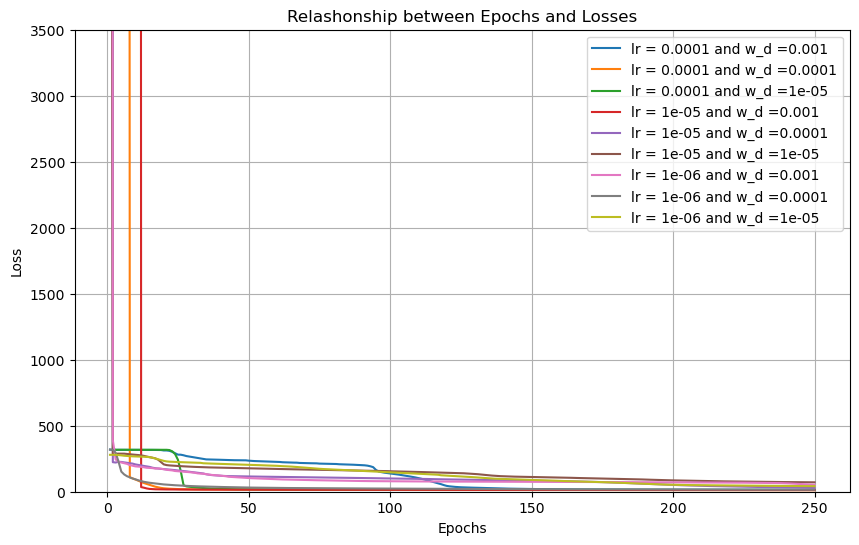

In [50]:
import matplotlib.pyplot as plt


"""
Function that plots the relashonship between the number of epochs and the loss value in the neural network from the Sung and 
Poggio model by changing the learning rate
"""
def plot_loss_epoch_changing_lr(epochs = 250, learning_rates=[1e-4, 1e-5, 1e-6], weight_decays = [1e-3, 1e-4, 1e-5]):
    
    # Implementing a list of epochs
    epoch_list = [el+1 for el in range(epochs)]
    
    # Composing a plot for each learning rate and weight decay on the input lists
    plt.figure(figsize=(10, 6))
    for lr in learning_rates:
        for w_d in weight_decays:
            print("Learning rate: " + str(lr) + " and Weight decay: " + str(w_d))
            model = SungAndPoggioClassifier()
            loss_per_epoch = train_model(model, train_data, train_labels, epochs=epochs, learning_rate=lr, w_d=w_d)
            plt.plot(epoch_list, loss_per_epoch, label = "lr = "+str(lr) + " and w_d ="+ str(w_d))
            print()
    
    # Inserting titles and labels on the final plot and then showing it
    plt.title("Relashonship between Epochs and Losses")
    plt.xlabel("Epochs")
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.ylim(0, 3500)
    plt.show()


# Invocation of the function for the implementation of the plot
plot_loss_epoch_changing_lr(epochs = 250)

Creation of a unique function which creates an instance of the model and it trains it. In this way we can decide to change some parameters and then we can see the ***execution time*** on the **training phase** and the correspondent accuracy.
We have only copied the various invocations that are part of the training phase of this model

In [51]:
import time


"""
Function that gropus all the passages of the model's training phase. In this way we could check the execution time on the 
training phase
"""
def model_preparation_SungPoggio(df_train_SungPoggio):
    
    # Extracting the starting time
    start_time = time.time()
    
    # Invocation of the previous function which pre-processes and separates the faces with the non-faces from the training set
    train_faces, train_nonfaces = separation_and_preprocessing(df_train_SungPoggio)
    train_faces, train_nonfaces
    
    # Invocation of the K-Means clustering for the face images and the non-face images in order to obtaining the cluster centers
    faces_cluster_centers, train_reduced_faces = cluster_samples(train_faces, num_clusters=6)
    nonfaces_cluster_centers, train_reduced_nonfaces = cluster_samples(train_nonfaces, num_clusters=6)
    
    # Computation of the covariance and subspace matrices associated to the face and non-face matrices
    faces_covariances, faces_subspaces = compute_covariance_and_subspace(train_reduced_faces, faces_cluster_centers)
    nonfaces_covariances, nonfaces_subspaces = compute_covariance_and_subspace(train_reduced_nonfaces, nonfaces_cluster_centers)
    
    # Concatenation of the cluster centers, the covariance matrices and the subspace matrices associated to the face or non-face images
    cluster_centers = np.concatenate([faces_cluster_centers, nonfaces_cluster_centers]) 
    covariances = np.concatenate([faces_covariances + nonfaces_covariances])
    subspaces = np.concatenate([faces_subspaces + nonfaces_subspaces])

    # Computation of the feature vectors of the face and non-face images from the training set
    train_features_vector_face = create_feature_vectors(train_reduced_faces, cluster_centers, covariances, subspaces)
    train_features_vector_nonface = create_feature_vectors(train_reduced_nonfaces, cluster_centers, covariances, subspaces)
    
    # Creating a new dataframe which contains the feature vectors of the face and non-face images and their labels
    train_images = train_features_vector_face + train_features_vector_nonface
    train_labels = [1] * len(train_reduced_faces) + [0] * len(train_reduced_nonfaces)
    new_train_df_SungPoggio = pd.DataFrame({'feature_vectors': train_images, 'labels': train_labels}, columns=['feature_vectors', 'labels'])

    # Sampling the rows of the dataframe without keeping the number of row's positional indexes
    new_train_df_SungPoggio = new_train_df_SungPoggio.sample(len(new_train_df_SungPoggio), replace=False, random_state=0)
    new_train_df_SungPoggio = new_train_df_SungPoggio.reset_index(drop = True)
    new_train_df_SungPoggio
    
    # Preparing the two lists for the columns of the training set
    train_data = np.array(new_train_df_SungPoggio["feature_vectors"].tolist())
    train_labels = np.array([[el] for el in new_train_df_SungPoggio["labels"].tolist()])
    
    # Extracting the ending time
    end_time = time.time()
    
    # Computing the execution time with the difference between the ending time and the starting time
    partial_training_time = end_time - start_time

    # Returning the loss_per_epoch list, the total execution time and the accuracy on the training phase
    return train_data, train_labels, cluster_centers, covariances, subspaces, partial_training_time, new_train_df_SungPoggio

Now we can finally check the results on the test phase such as ***execution time*** and ***accuracy*** by fixing the training set, the learning rate and the weight decay. We change the number of epochs in order to check the resuts.

We have fixed two parameters for every model producted with a variable number of epochs in the following way:
* *learning_rate* = 1e-5
* *weight_decay* = 1e-5

So, we have decided to implement a function that shows all the results of all the models into a **unique table**.

In [52]:
"""
Function that builds a model for each number of epochs for the neural network and it evaluates the final loss, the running time
on the training phase and the predictions on the test set and the accuracy of the model on the predictions on the test set and 
the training set
"""
def evaluating_model_by_epochs(df_train_SungPoggio, epoch_list = [10, 50, 100, 200, 250]):
    
    # Initialization of the lists that will contains the results of each model
    acc_list_train = []
    acc_list_test = []
    running_time_training = []
    running_time_test = []
    final_loss_list = []
    
    # Computing the feature vectors of the training, the cluster centers, the covariance matrices, the subspace matrices and the time of this process
    train_data, train_labels, cluster_centers, covariances, subspaces, partial_training_time, new_train_df_SungPoggio = model_preparation_SungPoggio(df_train_SungPoggio)
    
    # Loop on the various epochs
    for epochs in epoch_list:
        print("Epochs = " + str(epochs))
        
        # Creating and training the Sung and Poggio model and extracting the time of this process
        start_time = time.time()
        model = SungAndPoggioClassifier()
        loss_per_epoch = train_model(model, train_data, train_labels, epochs=epochs, learning_rate=1e-5, w_d=1e-5)
        end_time = time.time()
        final_training_time = end_time - start_time
        
        # Extracting the accuracy of the model on the training set
        acc_train = testing_training_set(model, new_train_df_SungPoggio)
        
        # Extracting the time and the accuracy of the model on the elements of the test set
        start_time = time.time()
        acc_test = testing_test_set(model, df_test_SungPoggio, cluster_centers, covariances, subspaces)
        end_time = time.time()
        total_testing_time = end_time - start_time
    
        # Inserting the train results on the lists
        running_time_training.append(partial_training_time + final_training_time)
        acc_list_train.append(acc_train)
        final_loss_list.append(loss_per_epoch[len(loss_per_epoch) - 1])
        
        # Inserting the test results on the lists
        running_time_test.append(total_testing_time)
        acc_list_test.append(acc_test)
        print()
        
    # Returning the lists containing the results of the models trained with a different number of epochs
    return acc_list_train, running_time_training, final_loss_list, running_time_test, acc_list_test


# Invocation of the previous function in order to obtain the lists and compare the results
acc_list_train, running_time_training, final_loss_list, running_time_test, acc_list_test = evaluating_model_by_epochs(df_train_SungPoggio)

C:\Users\lita4\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lita4\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lita4\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Epochs = 10
Epoch 1, Loss: 43501.31179699111
Epoch 2, Loss: 694.6517500021515
Epoch 3, Loss: 317.9089965465938
Epoch 4, Loss: 318.2013905442398
Epoch 5, Loss: 318.20141588993306
Epoch 6, Loss: 318.20816803754406
Epoch 7, Loss: 318.2165289490709
Epoch 8, Loss: 318.22540876613806
Epoch 9, Loss: 318.23441958268177
Epoch 10, Loss: 318.2436141476685

Epochs = 50
Epoch 1, Loss: 75864.73904588819
Epoch 2, Loss: 2032.5673882420122
Epoch 3, Loss: 318.88802969716556
Epoch 4, Loss: 318.7747381740229
Epoch 5, Loss: 318.755569534723
Epoch 6, Loss: 318.7520580752795
Epoch 7, Loss: 318.7508957872639
Epoch 8, Loss: 318.75041296295535
Epoch 9, Loss: 318.7501937158631
Epoch 10, Loss: 318.750090606368
Epoch 11, Loss: 318.7500444150078
Epoch 12, Loss: 318.75002205840235
Epoch 13, Loss: 318.75001162237146
Epoch 14, Loss: 318.75000692022536
Epoch 15, Loss: 318.7500050573874
Epoch 16, Loss: 318.75000419865205
Epoch 17, Loss: 318.7500011157322
Epoch 18, Loss: 318.750000396744
Epoch 19, Loss: 318.7500000186264

Epoch 80, Loss: 165.606570187966
Epoch 81, Loss: 164.56368348816656
Epoch 82, Loss: 163.40164488004183
Epoch 83, Loss: 162.5379767047569
Epoch 84, Loss: 161.03522257553976
Epoch 85, Loss: 159.88186390982548
Epoch 86, Loss: 159.11253341682328
Epoch 87, Loss: 158.36856223119835
Epoch 88, Loss: 157.24680147419653
Epoch 89, Loss: 155.74787805907943
Epoch 90, Loss: 154.95684964630647
Epoch 91, Loss: 153.4154168835463
Epoch 92, Loss: 151.8012031105784
Epoch 93, Loss: 150.8523960545346
Epoch 94, Loss: 149.8710706016535
Epoch 95, Loss: 148.4278894717435
Epoch 96, Loss: 147.47221089896794
Epoch 97, Loss: 146.63652688553228
Epoch 98, Loss: 145.50134776842174
Epoch 99, Loss: 144.69896661772205
Epoch 100, Loss: 143.86957526144627
Epoch 101, Loss: 142.97688415652618
Epoch 102, Loss: 141.7770055211032
Epoch 103, Loss: 140.97276307042256
Epoch 104, Loss: 140.0746982568579
Epoch 105, Loss: 139.1804817598808
Epoch 106, Loss: 138.3076377891745
Epoch 107, Loss: 137.52041697370518
Epoch 108, Loss: 136.756

Epoch 116, Loss: 14.28764527432213
Epoch 117, Loss: 14.249045486816613
Epoch 118, Loss: 14.227149665679462
Epoch 119, Loss: 14.202034274971084
Epoch 120, Loss: 14.165157099731005
Epoch 121, Loss: 14.12643854048656
Epoch 122, Loss: 14.110683243645326
Epoch 123, Loss: 14.08143532982649
Epoch 124, Loss: 14.046267752994027
Epoch 125, Loss: 14.027294273018924
Epoch 126, Loss: 14.003960086381994
Epoch 127, Loss: 13.965548961357854
Epoch 128, Loss: 13.945817370782606
Epoch 129, Loss: 13.90781715806952
Epoch 130, Loss: 13.902634447003948
Epoch 131, Loss: 13.868722913444799
Epoch 132, Loss: 13.835773104721738
Epoch 133, Loss: 13.829188738418452
Epoch 134, Loss: 13.794768280265998
Epoch 135, Loss: 13.773346661069809
Epoch 136, Loss: 13.745776113977627
Epoch 137, Loss: 13.718388523357135
Epoch 138, Loss: 13.698972685921035
Epoch 139, Loss: 13.676099641343171
Epoch 140, Loss: 13.649873386890249
Epoch 141, Loss: 13.631758451265341
Epoch 142, Loss: 13.603212150188483
Epoch 143, Loss: 13.585572511205

We have created a **table** which shows the comparation of the results obtained from the various models with a different number of epochs

In [53]:
import tabulate


"""
Function that prints a table in which, for each model produced by a different number of epochs, it shows the final loss, the
time of the training phase, the accuracy of the model on the element of the training set, the time for the predictions on the
test set and the accuracy of the model 
"""
def table_results_per_epochs(acc_list_train, running_time_training, final_loss_list, running_time_test, acc_list_test, epoch_list = [10, 50, 100, 200, 250]):
    print(tabulate.tabulate(list(zip(epoch_list, final_loss_list, running_time_training, acc_list_train, running_time_test, acc_list_test)), 
                            tablefmt='grid',
                            headers=["Number of epochs", "Final loss", " Training time", "Train accuracy", "Test time", "Test accuracy"]))


# Invocation of the function for printing the table
table_results_per_epochs(acc_list_train, running_time_training, final_loss_list, running_time_test, acc_list_test)

+--------------------+--------------+------------------+------------------+-------------+-----------------+
|   Number of epochs |   Final loss |    Training time |   Train accuracy |   Test time |   Test accuracy |
+====================+==============+==================+==================+=============+=================+
|                 10 |     318.244  |          455.327 |         0.99783  |     152.193 |        0.969715 |
+--------------------+--------------+------------------+------------------+-------------+-----------------+
|                 50 |      15.8168 |          488.484 |         0.997787 |     151.036 |        0.970684 |
+--------------------+--------------+------------------+------------------+-------------+-----------------+
|                100 |     120.697  |          530.339 |         0.997383 |     149.57  |        0.971108 |
+--------------------+--------------+------------------+------------------+-------------+-----------------+
|                200 |      

We have decided to implemenent a **plot** in which we show the ***trend of the accuracies of the models trained with a different number of epochs***. We have used the accuracies of the models' predictions on the elements of the training set and the test set.

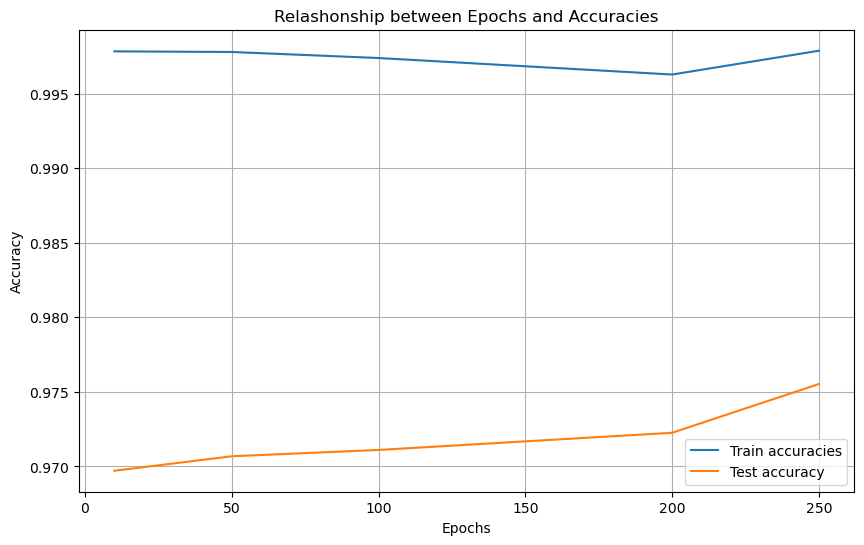

In [54]:
"""
Function that plots the trend of the train and test accuracies of the model trained by using a specific number of epochs.
It takes in input the list of train and test accuracies and the list of epochs used for training the various models setted
to specific elements by default.
"""
def plot_accuracies_models_by_epochs(acc_list_train, acc_list_test, epoch_list = [10, 50, 100, 200, 250]):
    
    # Composing a plot for each model trained by using a determined number of epochs
    plt.figure(figsize=(10, 6))
    plt.plot(epoch_list, acc_list_train, label = "Train accuracies")
    plt.plot(epoch_list, acc_list_test, label = "Test accuracy")
    print()
    
    # Inserting titles and labels on the final plot and then showing it
    plt.title("Relashonship between Epochs and Accuracies")
    plt.xlabel("Epochs")
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    
plot_accuracies_models_by_epochs(acc_list_train, acc_list_test)